# Piecewise Polytropic Fit

When creating neutron star stellar models numerically, it is common to fit a realistic EOS with piecewise polytropes that make numerical calculations easier.

In one of the common polytropic EOSs the pressure is written in terms of the mass density as

$$ P = K \hat{\rho}^{\gamma}. $$

In order to fit a numerical EOS to a polytropic one, it's possible to linearize the polytrope in the following way

\begin{align*}
\frac{P}{K} &= \rho^{\gamma} \\
\log_\rho\left( \frac{P}{K} \right) &= \gamma \\
\frac{\log_{10}\left( \frac{P}{K} \right) }{\log_{10}(\rho)} &= \gamma \\
\log_{10}(P) &= \gamma \log_{10}(\rho) + \log_{10}(K).
\end{align*}

In [2]:
import numpy as np
from matplotlib import pyplot as plt, rcParams
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import Physical_Const as phys


h=phys.h 
c=phys.c
G=phys.G
Msun=phys.Msun
mn=phys.mn # Neutron mass


rhodim=mn**4.0*c**3.0/(8.0*np.pi**2*(h/(2.0*np.pi))**3.0) #Dimensions of energy density
rdim=c/np.sqrt(rhodim*G) # Dimensions of radius
mdim=rdim*c**2.0/G # Dimensions of mass
Pdim=rhodim*c**2 # Dimensions of pressure

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rcParams["figure.figsize"] = (8,6)

Loading the EOS and getting rid of dimensions

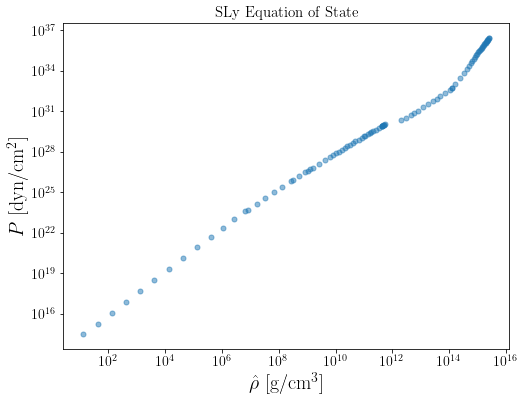

In [3]:
brhoSLy,PSLy=np.loadtxt('EOS/sly.dat',usecols=(0,1),unpack=True)
#rhoSLy = rhoSLy/rhodim
PSLy = (PSLy*c**2)

plt.loglog(brhoSLy,PSLy,"o", ms=5, alpha=0.5)
plt.xlabel(r'$\hat{\rho}$ [g/cm$^3$]')
plt.ylabel(r'$P$ [dyn/cm$^2$]')
plt.title('SLy Equation of State',fontsize = 15)
plt.show()

### Using a single polytrope

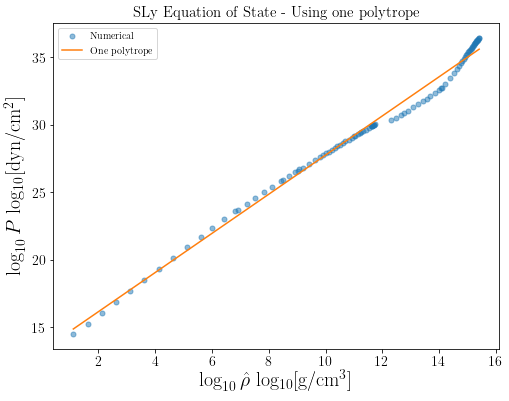

In [4]:
logbrho  = np.log10(brhoSLy)
logP = np.log10(PSLy)

clf = linear_model.LinearRegression()

clf.fit(logbrho[:,np.newaxis], logP)

brhogrid = np.linspace(logbrho[0],logbrho[-1],200)

polyP = clf.predict(brhogrid[:, np.newaxis])

plt.plot(logbrho,logP,"o", ms=5, alpha=0.5,label='Numerical')
plt.plot(brhogrid,polyP,label='One polytrope')
plt.title('SLy Equation of State - Using one polytrope',fontsize = 15)
plt.xlabel(r'$\log_{10}\hat{\rho}$ log$_{10}$[g/cm$^3$]')
plt.ylabel(r'$\log_{10}P$ log$_{10}$[dyn/cm$^2$]')
plt.legend()
plt.show()

How good is the fit?

In [5]:
print('Gamma',clf.coef_[0],'log10(K)',clf.intercept_ ,'RMSE',np.sqrt(mean_squared_error(logP, clf.predict(logbrho[:, np.newaxis]))),'R2',r2_score(logP, clf.predict(logbrho[:, np.newaxis])))

Gamma 1.4496673734965622 log10(K) 13.259433861446354 RMSE 0.5018491818376861 R2 0.9912364078122847


### Fixed number of pieces

According to J. Read et al. (2009) the best parametrization takes 4 pieces for the low density EOS and 3 pieces for the high density part. So making a fit with 7 segments

In [6]:
import pwlf #

In [7]:
polyfit1 = pwlf.PiecewiseLinFit(logbrho, logP)

res = polyfit1.fit(7)

In [8]:
logbrhoHat1 = np.linspace(min(logbrho), max(logbrho), num=10000)
logPHat1 = polyfit1.predict(logbrhoHat1)

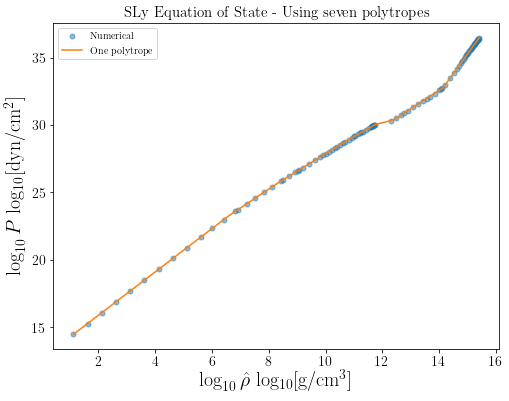

In [9]:
plt.plot(logbrho,logP,"o", ms=5, alpha=0.5,label='Numerical')
plt.plot(logbrhoHat1,logPHat1,label='One polytrope')
#plt.xlim(11,14)
#plt.ylim(25,31)
plt.title('SLy Equation of State - Using seven polytropes',fontsize = 15)
plt.xlabel(r'$\log_{10}\hat{\rho}$ log$_{10}$[g/cm$^3$]')
plt.ylabel(r'$\log_{10}P$ log$_{10}$[dyn/cm$^2$]')
plt.legend()
plt.show()

In [14]:
print('Suma residual de cuadrados\n',polyfit1.ssr) # sum-of-squares error
print('Puntos de unión \n',polyfit1.fit_breaks) # breakpoint locations
#print(polyfit1.n_parameters) # number of model parameters
#print(polyfit1.n_segments) # number of line segments
#print(polyfit1.beta) # model parameters
print('Pendientes\n',polyfit1.slopes) # slope of each line segment
print('Interceptos\n',polyfit1.intercepts) # y intercepts of each line segment

Suma residual de cuadrados
 0.011649058582318926
Puntos de unión 
 [ 1.11905582  6.53259674  8.27220169 10.65861669 11.73827623 12.39769556
 14.13693158 15.41043979]
Pendientes
 [1.60766651 1.4096157  1.29284554 1.20693887 0.52673228 1.3647561
 2.91340597]
Interceptos
 [12.6836719  13.97745799 14.9434043  15.8590506  23.8435034  13.45393924
 -8.43921812]


According to J. Raithel et al. (2018) the best parametrization for the high density part takes 5 pieces. So making a fit with 9 segments

In [ ]:
polyfit2 = pwlf.PiecewiseLinFit(logbrho, logP)

res = polyfit2.fit(9)

logbrhoHat2 = np.linspace(min(logbrho), max(logbrho), num=10000)
logPHat2 = polyfit2.predict(logbrohHat)

In [ ]:
plt.plot(logbrho,logP,"o", ms=5, alpha=0.5,label='Numerical')
plt.plot(logbrhoHat2,logPHat2,label='One polytrope')
#plt.xlim(11,14)
#plt.ylim(25,31)
plt.title('SLy Equation of State - Using nine polytropes',fontsize = 15)
plt.xlabel(r'$\log_{10}\hat{\rho}$ log$_{10}$[g/cm$^3$]')
plt.ylabel(r'$\log_{10}P$ log$_{10}$[dyn/cm$^2$]')
plt.legend()
plt.show()

In [ ]:
print(polyfit2.ssr) # sum-of-squares error
print(polyfit2.fit_breaks) # breakpoint locations
#print(polyfit2.n_parameters) # number of model parameters
#print(polyfit2.n_segments) # number of line segments
#print(polyfit2.beta) # model parameters
print(polyfit2.slopes) # slope of each line segment
print(polyfit2.intercepts) # y intercepts of each line segment

### Optimizing the number of pieces with Bayesian optimization (Does not converge)

In [ ]:
from GPyOpt.methods import BayesianOptimization
# initialize piecewise linear fit with your x and y data
x = logbrho
y = logP
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# define your objective function


def my_obj(x):
    # define some penalty parameter l
    # you'll have to arbitrarily pick this
    # it depends upon the noise in your data,
    # and the value of your sum of square of residuals
    l = y.mean()*0.01
    f = np.zeros(x.shape[0])
    for i, j in enumerate(x):
        my_pwlf.fit(j[0])
        f[i] = my_pwlf.ssr + (l*j[0])
    return f


# define the lower and upper bound for the number of line segments
bounds = [{'name': 'var_1', 'type': 'discrete',
           'domain': np.arange(2, 40)}]

np.random.seed(12121)

myBopt = BayesianOptimization(my_obj, domain=bounds, model_type='GP',
                              initial_design_numdata=10,
                              initial_design_type='latin',
                              exact_feval=True, verbosity=True,
                              verbosity_model=False)
max_iter = 30

# perform the bayesian optimization to find the optimum number
# of line segments
myBopt.run_optimization(max_iter=max_iter, verbosity=True)

print('\n \n Opt found \n')
print('Optimum number of line segments:', myBopt.x_opt)
print('Function value:', myBopt.fx_opt)
myBopt.plot_acquisition()
myBopt.plot_convergence()

# perform the fit for the optimum
my_pwlf.fit(myBopt.x_opt)
# predict for the determined points
xHat = np.linspace(min(x), max(x), num=1000)
yHat = my_pwlf.predict(xHat)